In [1]:
#Import library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Load Data

In [2]:
url = 'https://raw.githubusercontent.com/rdazmn/FYP/master/ML-MATT-CompetitionQT1920_train2.csv'
url2 = 'https://raw.githubusercontent.com/rdazmn/FYP/master/ML-MATT-CompetitionQT1920_test.csv'
data = pd.read_csv(url, error_bad_lines=False)
data_test =pd.read_csv(url2,error_bad_lines=False)


In [3]:
data.shape

(36904, 14)

In [4]:
data.describe()

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,Unusual
count,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36815.000000,36815.000000,36904.000000
mean,7.835090,2.106396,0.560525,0.067610,17.764369,1.791974,1.173441,0.665143,4.190819,3.063371,0.275932
std,8.428206,2.247514,0.727623,0.186555,15.739932,5.028928,0.214065,0.535493,1.772484,1.387446,0.446989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.213000,0.707000,0.140000,0.021000,5.710750,0.362000,1.041000,0.010000,3.000000,2.000000,0.000000
50%,4.547000,1.314000,0.352000,0.040000,14.170000,0.703000,1.112000,1.011000,4.000000,3.000000,0.000000
75%,12.126000,2.728000,0.718000,0.075000,25.059500,1.242000,1.263000,1.051000,5.000000,4.000000,1.000000
max,51.333000,77.505000,19.601000,12.461000,140.008000,48.253000,2.915000,2.668000,12.000000,12.000000,1.000000


Downlink definition – signal coming from a cell tower to your cellular device

Uplink definition – signal leaving your cellular device and going back to a cell tower

Most of us have experienced cell phone conversations when you can hear the other person but they can’t hear you or vice versa. 
A disruption in downlink or uplink in cellular communication causes this issue.

Imputation - drop rows or column include missing values

In [5]:
#Change object to float64

data['Time'] = pd.to_datetime(data['Time'],format='%H:%M').dt.hour
data['maxUE_UL_DL'] = pd.to_numeric(data['maxUE_UL_DL'],errors='coerce')
data['maxUE_DL'] = data['maxUE_DL'].replace(np.nan, 0)
data['maxUE_UL'] = data['maxUE_UL'].replace(np.nan, 0)
data['maxUE_UL_DL'] = data['maxUE_UL_DL'].replace('#¡VALOR!',0)
data['maxUE_UL_DL'] = data['maxUE_UL_DL'].replace(np.nan,0)



In [6]:
data.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL_DL,Unusual
0,10,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7.0,1
1,9,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10.0,1
2,7,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2.0,1
3,2,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4.0,1
4,3,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3.0,0


In [7]:
#Filling all missing values with 0
data = data.fillna(0)
#Filling missing values with medians of the columns
data = data.fillna(data.median())

In [8]:
data.isna().any()

Time           False
CellName       False
PRBUsageUL     False
PRBUsageDL     False
meanThr_DL     False
meanThr_UL     False
maxThr_DL      False
maxThr_UL      False
meanUE_DL      False
meanUE_UL      False
maxUE_DL       False
maxUE_UL       False
maxUE_UL_DL    False
Unusual        False
dtype: bool

Handling Outliers - Outlier technique

#PRBUsage UL

In [9]:
#The actual maximum threshold of PRBUsageUL is
maxThrUL = data['PRBUsageUL'].quantile(0.95)
maxThrUL

25.768

In [10]:
#This indicate the outlier of each PRBUsageUL value which more than max threshold
data[data['maxThr_UL']>maxThrUL]

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL_DL,Unusual
110,0,6BLTE,18.593,11.014,5.302,0.565,57.651,45.350,1.233,0.01,5.0,4.0,9.0,0
225,17,6BLTE,16.067,6.568,2.816,0.324,57.454,38.727,1.223,0.01,5.0,4.0,9.0,0
268,12,6BLTE,12.935,4.378,2.156,0.286,51.421,45.151,1.124,0.01,5.0,3.0,8.0,1
275,10,6BLTE,21.018,8.993,4.384,0.545,57.248,43.766,1.243,0.01,5.0,4.0,9.0,0
290,0,6BLTE,19.705,7.579,3.122,0.292,55.700,44.178,1.273,0.01,5.0,4.0,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36612,10,6CLTE,12.227,1.011,0.221,0.995,17.109,30.519,1.172,0.01,4.0,3.0,7.0,0
36662,7,6BLTE,3.781,3.383,3.185,0.489,63.694,45.997,1.015,0.01,3.0,2.0,5.0,1
36789,18,6BLTE,21.625,9.297,4.618,0.554,54.910,42.259,1.293,0.01,5.0,5.0,10.0,0
36814,17,6BLTE,15.663,4.850,2.617,0.317,67.291,44.631,1.172,0.01,5.0,3.0,8.0,0


In [11]:
#The actual maximum threshold of PRBUsageUL is
minThrUL = data['PRBUsageUL'].quantile(0.05)
minThrUL

0.10099999999999999

In [12]:
data[data['meanThr_UL']<minThrUL]

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL_DL,Unusual
0,10,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7.0,1
2,7,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2.0,1
3,2,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4.0,1
4,3,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3.0,0
5,13,9ALTE,15.966,1.819,0.415,0.071,10.116,0.706,1.364,1.314,6.0,5.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36899,21,6ALTE,7.579,0.808,0.164,0.037,7.980,0.375,1.101,0.010,4.0,3.0,7.0,0
36900,9,8CLTE,9.095,1.213,0.189,0.030,19.510,1.583,1.122,1.031,4.0,2.0,6.0,0
36901,13,9BLTE,4.378,0.896,0.341,0.030,12.037,0.540,1.065,1.005,4.0,3.0,7.0,1
36902,12,3CLTE,13.339,2.728,0.559,0.065,28.187,0.894,1.223,1.061,5.0,4.0,9.0,0


In [13]:
#The actual maximum threshold of PRBUsageDL is
maxThrDL = data['PRBUsageDL'].quantile(0.95)
maxThrDL

6.07

In [14]:
#The actual maximum threshold of PRBUsageUL is
minThrDL = data['PRBUsageDL'].quantile(0.05)
minThrDL

0.40399999999999997

In [15]:
data2 =data[(data['PRBUsageUL']<maxThrUL) & (data['PRBUsageUL']>minThrUL) & (data['PRBUsageDL']<maxThrDL) & (data['PRBUsageDL']>minThrUL) ]
data2.shape

(31500, 14)

In [16]:
data2.sample(10)

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL_DL,Unusual
27001,12,9BLTE,4.345,0.909,0.545,0.020,43.903,0.303,1.041,1.031,3.0,3.0,6.0,0
17909,18,3BLTE,17.684,2.728,0.557,0.091,14.640,1.122,1.485,1.101,7.0,4.0,11.0,0
16825,21,7BLTE,0.303,1.314,0.420,0.051,20.140,1.034,1.283,0.010,6.0,2.0,8.0,0
5965,20,1ALTE,13.831,2.587,0.658,0.054,17.598,1.612,1.154,1.035,5.0,3.0,8.0,1
1597,12,3BLTE,18.492,1.920,0.394,0.060,18.784,0.710,1.293,1.172,5.0,5.0,10.0,0
13374,18,6ALTE,10.408,2.122,0.766,0.060,22.338,0.615,1.162,0.010,4.0,3.0,7.0,0
2634,22,5ALTE,7.680,1.112,0.206,0.024,18.061,0.363,1.091,1.031,4.0,3.0,7.0,0
32376,2,8BLTE,2.886,0.597,0.165,0.021,8.873,0.368,1.075,1.005,3.0,2.0,5.0,1
22439,9,1BLTE,4.080,0.597,0.110,0.019,3.794,0.318,1.045,1.005,3.0,2.0,5.0,1
439,8,1CLTE,13.134,2.587,1.345,0.051,19.035,0.503,1.114,1.035,4.0,3.0,7.0,1


Change cellname to one hot encoder

In [17]:
#pd.get_dummies(data2, columns=["CellName"]).head(10)

Train XGB

In [18]:
X = data2.iloc[:,2:13]
y = data2.iloc[:,13]
y = y.astype('int')

#Split into train and test set using sklearn model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [19]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

<AxesSubplot:xlabel='PRBUsageDL'>

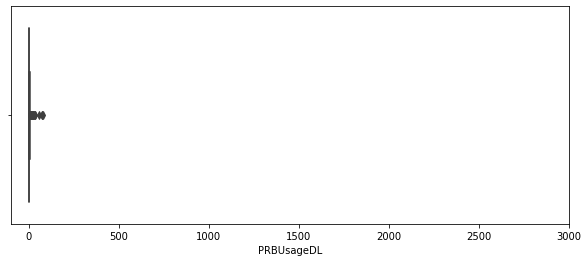

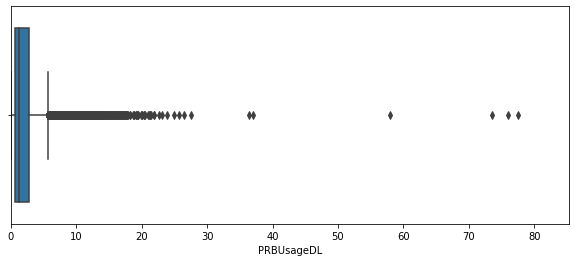

In [20]:
import seaborn as sns
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=data['PRBUsageDL'])

plt.figure(figsize=(10,4))
plt.xlim(data['PRBUsageDL'].min(), data['PRBUsageDL'].max()*1.1)
sns.boxplot(x=data['PRBUsageDL'])

In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [22]:
# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", XGBClassifier())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline, X.to_dict('records'), y, 
                                   scoring='neg_mean_squared_error', cv=10)
# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

10-fold RMSE:  0.07345016688720903


In [26]:
# Create the XGB classifier - xgb_model.
xgb_model = XGBClassifier(n_estimators=100)
xgb_model.fit(X_train, y_train, eval_metric=['error'], eval_set=[((X_train, y_train)),(X_test, y_test)])

[0]	validation_0-error:0.14353	validation_1-error:0.14444
[1]	validation_0-error:0.14071	validation_1-error:0.14175
[2]	validation_0-error:0.14083	validation_1-error:0.14206
[3]	validation_0-error:0.13361	validation_1-error:0.13476
[4]	validation_0-error:0.13127	validation_1-error:0.13206
[5]	validation_0-error:0.13071	validation_1-error:0.13143
[6]	validation_0-error:0.12540	validation_1-error:0.12476
[7]	validation_0-error:0.12448	validation_1-error:0.12429
[8]	validation_0-error:0.11667	validation_1-error:0.11762
[9]	validation_0-error:0.11516	validation_1-error:0.11746
[10]	validation_0-error:0.11333	validation_1-error:0.11429
[11]	validation_0-error:0.10381	validation_1-error:0.10619
[12]	validation_0-error:0.09020	validation_1-error:0.09540
[13]	validation_0-error:0.07405	validation_1-error:0.07794
[14]	validation_0-error:0.07202	validation_1-error:0.07397
[15]	validation_0-error:0.06631	validation_1-error:0.06794
[16]	validation_0-error:0.06599	validation_1-error:0.06762
[17]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 0, 'Number of iterations')

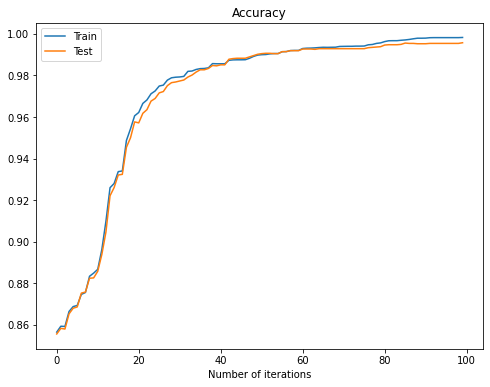

In [27]:
# Plot and display the performance evaluation
xgb_eval = xgb_model.evals_result()
eval_steps = range(len(xgb_eval['validation_0']['error']))

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 6))

ax.plot(eval_steps, [1-x for x in xgb_eval['validation_0']['error']], label='Train')
ax.plot(eval_steps, [1-x for x in xgb_eval['validation_1']['error']], label='Test')
ax.legend()
ax.set_title('Accuracy')
ax.set_xlabel('Number of iterations')

In [28]:
# Select trained model.
n_trees = 40
y_pred = xgb_model.predict(X_test, ntree_limit= n_trees)

In [31]:
# Check the accuracy of the trained model.
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 98.46%


Text(0, 0.5, 'True Positive Rate')

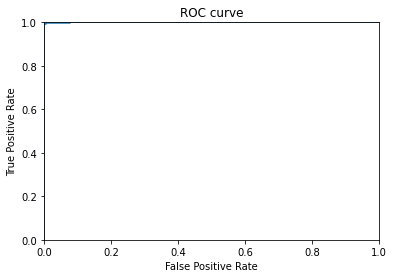

In [32]:
y_pred_prob = xgb_model.predict_proba(X_test)

# ROC-AUC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

This is the ROC-AUC curve - the area under the curve represents the accuracy of the predictions. You can see that the area under the curve is large, indicating that the predictions are highly accurate.

In [37]:
# Search for the best parameters.
parameters = {'reg_alpha': [0.0, 1.0, 2.0], 'reg_lambda': [0.0, 1.0, 2.0], 'n_estimators': [n_trees], 'seed': [1337]}
clf = GridSearchCV(estimator = xgb_model, param_grid = parameters, scoring='accuracy', cv=5, verbose=1, n_jobs=10, refit=True)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  45 out of  45 | elapsed:   16.6s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [38]:
print('Best score: %.1f%%' % (clf.best_score_*100))
print('Best parameter set: %s' % (clf.best_params_))

Best score: 98.7%
Best parameter set: {'n_estimators': 40, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'seed': 1337}


In [39]:
y_pred = clf.best_estimator_.predict(X_test, ntree_limit= n_trees)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 98.86%


The test set's accuracy is about the same for both the tuned model and the trained model with default hyperparameter values, even though the tuned hyperparameters are different from the default parameters.